# Practicing PCA on a Face Dataset
In this exercise, we explore the application of the PCA on the LFW (Labeled Faces in the Wild) dataset which is available through the sklearn package.
# Submission
- There are three tasks for you.
- Report the results and answer the questions in the pdf file that you would submit along with your other solutions.
- Additionally, submit your code in the same Jupiter notebook format. (keep the overal format of the notebook unchanged)


# Packages
First of all, let's import the packages we need for this assignment. 

In [1]:
# CS-4ML3 Assignment One
# Tahseen Ahmed - ahmedt26
# Feb 20th, 2021
# ========================

# Importing required libraries
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dataset characteristics
Here we take a look at the structure/properties of the dataset.

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
n_samples, image_height, image_width = lfw_people.images.shape

X = lfw_people.data
# the label to predict is the id of the person
Y = lfw_people.target
Y_names = lfw_people.target_names
n_classes = Y_names.shape[0]

print("Dataset properties:")
print("\t Number of data points: %d" % X.shape[0])
print("\t Number of features: %d" % X.shape[1])
print("\t Number of classes: %d" % n_classes)
print("\t Width of each image: %d" % image_width)
print("\t Height of each image: %d" % image_height)

Dataset properties:
	 Number of data points: 1288
	 Number of features: 11750
	 Number of classes: 7
	 Width of each image: 94
	 Height of each image: 125


# Showing the pictures

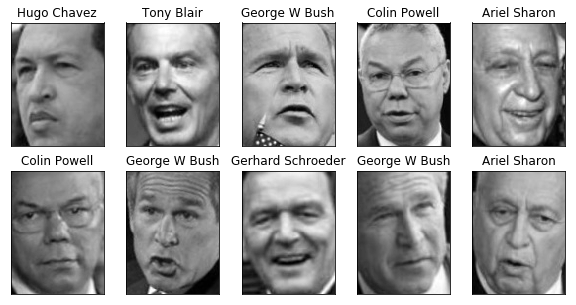

In [3]:
def plot_faces(images, labels, names, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    f = plt.figure(figsize=(10,5))
    for i in range(n_row * n_col):
        subfigure = f.add_subplot(n_row, n_col, i + 1)
        subfigure.imshow(images[i].reshape((image_height, image_width)), cmap=plt.cm.gray)       
        subfigure.set_title(names[labels[i]])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()
    

plot_faces(X, Y, Y_names, 2, 5)

# Eigenfaces
Run the below code to generate the "average faces" as well as the first "eigen faces" for each of the seven classes. This is just a demonstration; no need to do anything here.

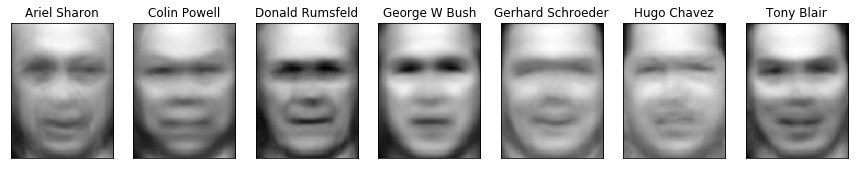

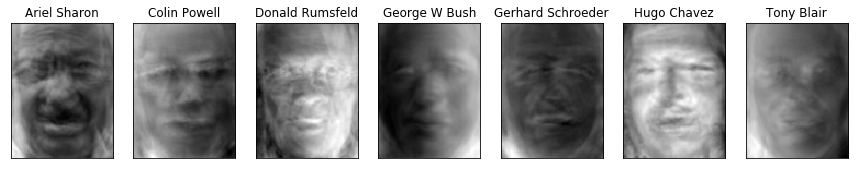

In [4]:
def average_image_per_class(images, labels, label):
    class_average = np.mean(images[labels == label], axis = 0)
    return class_average

def eigen_face_per_class(images, labels, label):
    pca = PCA(n_components=2)
    pca.fit(images[labels == label])
    eigen_faces = pca.components_
    return eigen_faces[0, :]
    
def plot_class_representatives(images, labels, names, aggregator):
    f = plt.figure(figsize=(15,10))
    for i in range(7):
        subfigure = f.add_subplot(1, 7, i + 1)
        class_representative = aggregator(X, Y, i)
        
        subfigure.imshow(class_representative.reshape((image_height, image_width)), cmap=plt.cm.gray)       
        subfigure.set_title(Y_names[i])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_class_representatives(X, Y, Y_names, aggregator=average_image_per_class)
plot_class_representatives(X, Y, Y_names, aggregator=eigen_face_per_class)

# PCA visualization
It is hard to visualize and get a sense of highdimensional data. One approach to address this problem is "dimensionality reduction". Here we project the data into the 2D plane to be able to "see" what is going on. 

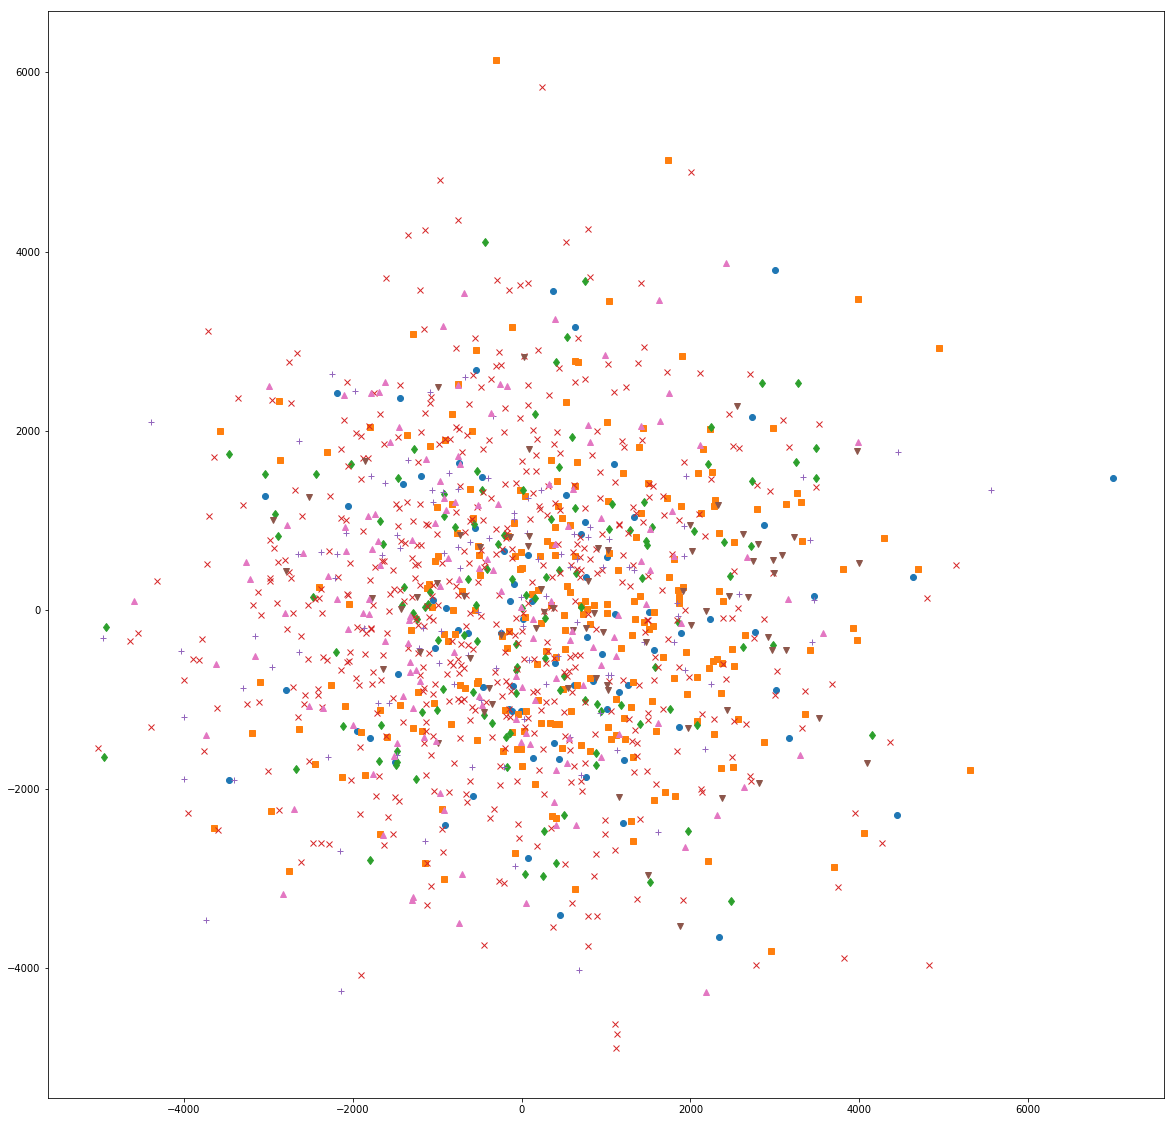

In [5]:
def pca_visualization(images, labels):
    pca = PCA(n_components=2)
    # This time we apply PCA one the whole data set
    pca.fit(images)  
    # Transforming the data into the 2D space
    T = pca.transform(images)
    
    markers = ['o', 's', 'd', 'x', '+', 'v', '^']
    fig = plt.figure(figsize=(20,20))
    for label in range(0,7):
        plt.plot(T[labels==label, 0], T[labels==label, 1], markers[label])

pca_visualization(X, Y)

# <font color="red">Task 1: Reconstructing images</font>
Some information is naturally lost when reducing the dimensionality of the data (just like the above scatter plot). In this part use the PCA (applied to the whole data set) to reduce the dimensionality of the data points to 2. Then, transform the 2D data points back to the original space to reconstruct the images. 

 - Plot the first 10 reconstructed images in the data set and include it in your pdf report. (10 points)

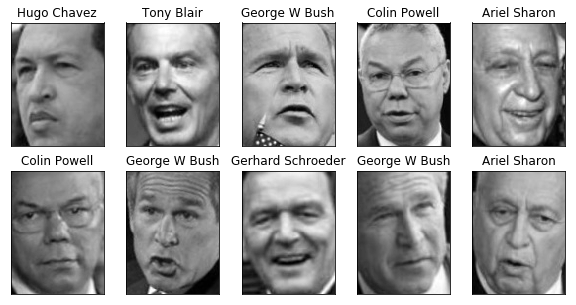

Reconstruction of Faces from 2 principal components:
Aggregator: Average Image per Class


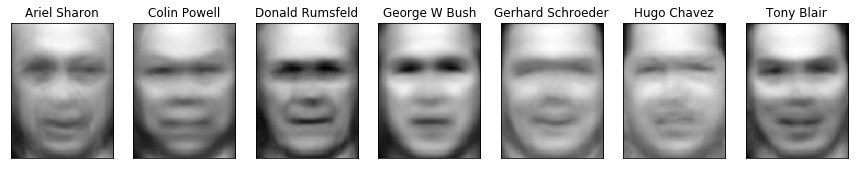

Aggregator: Eigen Face per Class


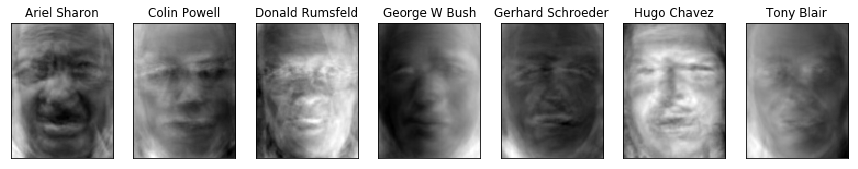

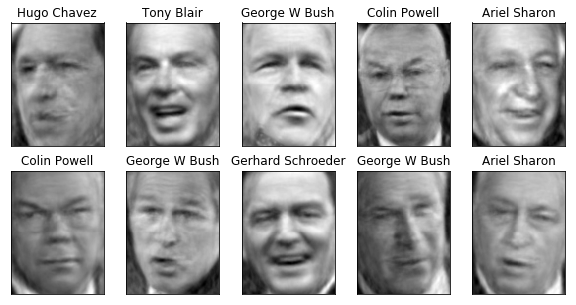

In [6]:
# This function returns the reconstructed images from the dataset.
def task_one(images, labels):
    image_pca = PCA(n_components = 179)
    # Apply PCA to the entire dataset
    image_pca.fit(images)  
    # Transforming the data into the 2D space
    transformed_images = image_pca.transform(images)
    
    # Reconstruct original data from PCA
    recon_images = image_pca.inverse_transform(transformed_images)
    print("Reconstruction of Faces from 2 principal components:")
    print("Aggregator: Average Image per Class")
    plot_class_representatives(recon_images, Y, Y_names, aggregator=average_image_per_class)
    print("Aggregator: Eigen Face per Class")
    plot_class_representatives(recon_images, Y, Y_names, aggregator=eigen_face_per_class)
    
    return recon_images
plot_faces(X, Y, Y_names, 2, 5)
plot_faces(task_one(X,Y), Y, Y_names, 2, 5)

# <font color="red">Task 2: Average Reconstruction Error</font>
Here we aim at measuring the information loss. First let's define the reconstruction error. We define the reconstruction error of a data point as the square of the Euclidean distance between the reconstructed image and the original image. 

- Apply PCA with only two components, and compute the average reconstruction error for each of the 7 classes, and include them in your report. Which class has the highest average reconstruction error? (10 points)
- If we use more components, we would get less error. What is the minimum number of components that we can choose so that the average reconstruction error for all (and each) of the classes is below 100? (10 points)

MSE in PCA, 2 Components for All Classes (entire dataset): 1043.561
MSE in PCA, 4 Components for All Classes (entire dataset): 855.35834
MSE in PCA, 179 Components for All Classes (entire dataset): 99.44971
PCA of 2 Components, MSE of each face (Original PCA):


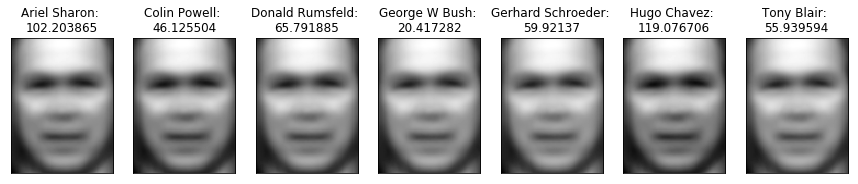

PCA of 4 Components, MSE of each face (PCA where each class' MSE < 100):


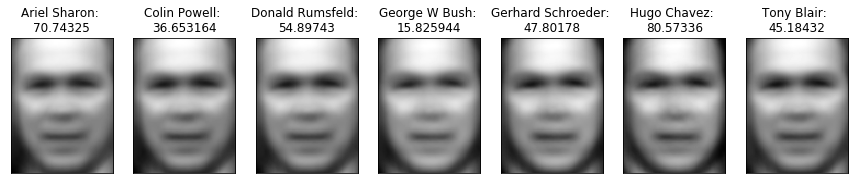

PCA of 179 Components, MSE of each face (PCA where entire set's MSE < 100):


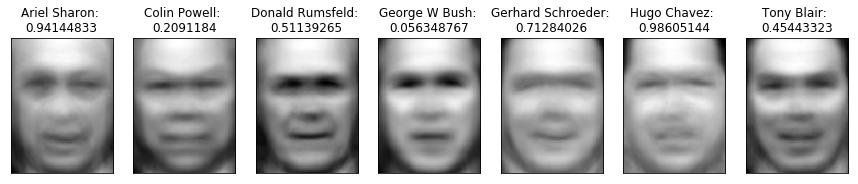

In [7]:
# This function is a skeletonized task one, just to get a reconstructed set.
# Added comps parameter which denotes number of components
def reconstruct_set(images, labels, comps):
    # print("Components Used: " + str(comps))
    image_pca = PCA(n_components = comps)
    # Apply PCA to the given dataset
    image_pca.fit(images)  
    # Transforming the data into the n-dimensional space where comps = n
    transformed_images = image_pca.transform(images)
    # Reconstruct original data from PCA
    new_X = image_pca.inverse_transform(transformed_images)
    # Return the reconstructed dataset.
    return new_X

# We are looking for the MSE of the dataset
# This function returns the MSE of an original and reconstructed image set or class.
def get_MSE(orig_set, recon_set):
    recon_MSE = ((orig_set - recon_set) ** 2).mean()
    return recon_MSE
print("=============================================================")
print("MSE in PCA, 2 Components for All Classes (entire dataset): " + str(get_MSE(X, reconstruct_set(X,Y,2))))
print("MSE in PCA, 4 Components for All Classes (entire dataset): " + str(get_MSE(X, reconstruct_set(X,Y,4))))
# 179 Principal Components are required for a dataset MSE < 100.
print("MSE in PCA, 179 Components for All Classes (entire dataset): " + str(get_MSE(X, reconstruct_set(X,Y,179))))
print("=============================================================")
# A modification of plot_task_representatives.
# Gets the MSE of each person. One for 2 components (default)
# and another where each MSE is less than 100.
def task_two(pcs, images, labels, names, aggregator):
    f = plt.figure(figsize=(15,10))
    X_recon = reconstruct_set(X,Y,pcs)
    for i in range(7):
        subfigure = f.add_subplot(1, 7, i + 1)
        class_representative = aggregator(X, Y, i)
        class_representative_recon = aggregator(X_recon, Y, i)
        
        subfigure.imshow(class_representative_recon.reshape((image_height, image_width)), cmap=plt.cm.gray)       
        subfigure.set_title(str(Y_names[i]) + ": \n" + str(get_MSE(class_representative,class_representative_recon)))
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()

print("=============================================================")
print("PCA of 2 Components, MSE of each face (Original PCA):")
task_two(2, X, Y, Y_names, aggregator=average_image_per_class)
print("=============================================================")

print("=============================================================")
print("PCA of 4 Components, MSE of each face (PCA where each class' MSE < 100):")
task_two(4, X, Y, Y_names, aggregator=average_image_per_class)
print("=============================================================")

print("=============================================================")
print("PCA of 179 Components, MSE of each face (PCA where entire set's MSE < 100):")
task_two(179, X, Y, Y_names, aggregator=average_image_per_class)
print("=============================================================")

# <font color="red">Task 3: Train-Test Separation for PCA</font>
Use only the first 100 data points to find the PCA mapping (we call this set the training set, and the rest of the data set is called the test set). Then use this mapping to map all the images (train and test) to the 2d space and then back to the original space.

- Report the average reconstruction error for the train and the test images (no need to report for each class separately). Which one is higher? Why? (10 points)
- In the above, instead of using only the top 2 principal components, use the top 100 components. Report the average train and test reconstruction errors. Compare the results with the previous part and justify them. (10 points)

In [8]:
# Modified reconstruct_set to return the 
def recon_from_train_test(train_images, test_images, labels, comps):
    # print("Components Used: " + str(comps))
    train_pca = PCA(n_components = comps)
    # Apply PCA to the given training dataset
    train_pca.fit(train_images)  
    # Transforming data using testing images
    transformed_images = train_pca.transform(test_images)
    # Reconstruct original data from PCA
    new_X = train_pca.inverse_transform(transformed_images)
    # Return the reconstructed dataset.
    return new_X


# We split X and Y from the first 100 (0 to 99 and 100 - end)
def task_three():
    X_train, X_test, Y_train, Y_test = X[0:100], X[100:], Y[0:100], Y[100:]
    split_X_train = recon_from_train_test(X_train, X_train, Y_train, 2)
    split_X_test = recon_from_train_test(X_train, X_test, Y_train, 2)
    print("======================================================================")
    print("Test and Train PCA with 2 components:")
    print("Training Error (2 components): " + str(get_MSE(X_train, split_X_train)))
    print(" Testing Error (2 components): " + str(get_MSE(X_test, split_X_test)))
    print("======================================================================")
    split_X_train_onehundred = recon_from_train_test(X_train, X_train, Y_train, 100)
    split_X_test_onehundred = recon_from_train_test(X_train, X_test, Y_train, 100)
    print("======================================================================")
    print("Test and Train PCA with 100 components:")
    print("Training Error (100 components): " + str(get_MSE(X_train, split_X_train_onehundred)))
    print(" Testing Error (100 components): " + str(get_MSE(X_test, split_X_test_onehundred)))
    print("======================================================================")
    split_X_train_reversed = recon_from_train_test(X_test, X_test, Y_test, 100)
    split_X_test_reversed = recon_from_train_test(X_test, X_train, Y_test, 100)
    print("======================================================================")
    print("Test and Train PCA with 100 components, using larger training set:")
    print("Training Error (Reversed) (100 components): " + str(get_MSE(X_test, split_X_train_reversed)))
    print(" Testing Error (Reversed) (100 components): " + str(get_MSE(X_train, split_X_test_reversed)))
    print("======================================================================")

task_three();


Test and Train PCA with 2 components:
Training Error (2 components): 1012.49164
 Testing Error (2 components): 1084.1616
Test and Train PCA with 100 components:
Training Error (100 components): 1.1718704e-09
 Testing Error (100 components): 370.51874
Test and Train PCA with 100 components, using larger training set:
Training Error (Reversed) (100 components): 170.04848
 Testing Error (Reversed) (100 components): 214.98373
